In [1]:
#https://keras.io/preprocessing/image/
#

In [2]:
HOMEPATH = "/home/ubuntu/fastai/"
epochs = 5
batch_size = 64

In [3]:
import keras
from keras import backend as K
from keras.datasets import cifar10
import numpy as np
from keras import utils as np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

import os
os.chdir(HOMEPATH)
print ("current working directory:", os.getcwd())
#set cwd to load utilities
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


current working directory: /home/ubuntu/fastai


In [4]:
print (keras.__version__)

2.0.8


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print ("x_train:", type(x_train), x_train.shape)
print ("y_train:", type(y_train), y_train.shape, np.unique(y_train))
print ("x_test:", type(x_test), x_test.shape)
print ("y_test:", type(y_test), y_test.shape, np.unique(y_test))

x_train: <class 'numpy.ndarray'> (50000, 3, 32, 32)
y_train: <class 'numpy.ndarray'> (50000, 1) [0 1 2 3 4 5 6 7 8 9]
x_test: <class 'numpy.ndarray'> (10000, 3, 32, 32)
y_test: <class 'numpy.ndarray'> (10000, 1) [0 1 2 3 4 5 6 7 8 9]


In [7]:
num_classes = len(np.unique(y_train))
print ("num_classes:", num_classes)

num_classes: 10


In [8]:
print (np.unique(x_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [9]:
print ("x_test: len:", len(np.unique(x_test)), ", max:", max(np.unique(x_test)), 
       ",1st 10 unique values:", np.unique(x_test)[0:10])

x_test: len: 256 , max: 255 ,1st 10 unique values: [0 1 2 3 4 5 6 7 8 9]


In [10]:
#convert to float & divide by 255 to create range 0.0 to 1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [12]:
print (type(y_train), y_train.shape)
print (type(y_test), y_test.shape)
print (y_test[0,:])

<class 'numpy.ndarray'> (50000, 10)
<class 'numpy.ndarray'> (10000, 10)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [13]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


In [14]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [15]:
datagen_test = ImageDataGenerator()
datagen_test.fit(x_test)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [21]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

#print (K.eval(model.optimizer.lr))
#model.optimizer.lr = 0.001
#print (model.optimizer.lr)
#model.optimizer.lr = 0.01
#print (model.optimizer.lr)


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [23]:
# fits the model on batches with real-time data augmentation:
history1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train) / batch_size, 
                              validation_data=datagen_test.flow(x_test, y_test, batch_size=batch_size),
                              validation_steps= len(x_train) / batch_size,
                              epochs=epochs)

Epoch 1/5
782/781 [==============================] - 43s - loss: 1.9534 - acc: 0.2771 - val_loss: 2.2621 - val_acc: 0.1513
Epoch 2/5
782/781 [==============================] - 43s - loss: 1.7223 - acc: 0.3673 - val_loss: 2.4211 - val_acc: 0.1229
Epoch 3/5
782/781 [==============================] - 43s - loss: 1.6209 - acc: 0.4041 - val_loss: 2.4097 - val_acc: 0.1691
Epoch 4/5
782/781 [==============================] - 43s - loss: 1.5486 - acc: 0.4367 - val_loss: 2.7314 - val_acc: 0.1480
Epoch 5/5
782/781 [==============================] - 43s - loss: 1.4923 - acc: 0.4622 - val_loss: 2.8254 - val_acc: 0.1404


In [24]:
# list all data in history
print(history1.history.keys())


dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


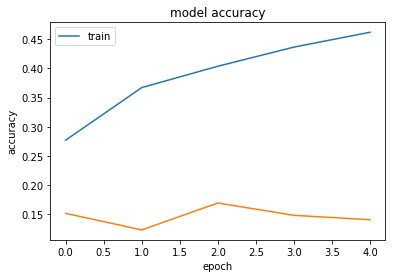

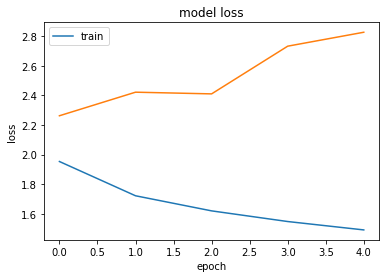

In [25]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [26]:
# fits the model on batches with real-time data augmentation:
history2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train) / batch_size, 
                              validation_data=datagen_test.flow(x_test, y_test, batch_size=batch_size),
                              validation_steps= len(x_train) / batch_size,
                              epochs=epochs)

Epoch 1/5
782/781 [==============================] - 44s - loss: 1.4463 - acc: 0.4779 - val_loss: 2.8194 - val_acc: 0.1841
Epoch 2/5
782/781 [==============================] - 44s - loss: 1.3984 - acc: 0.4931 - val_loss: 2.9305 - val_acc: 0.1761
Epoch 3/5
782/781 [==============================] - 44s - loss: 1.3630 - acc: 0.5091 - val_loss: 2.9011 - val_acc: 0.1767
Epoch 4/5
782/781 [==============================] - 43s - loss: 1.3334 - acc: 0.5218 - val_loss: 2.9461 - val_acc: 0.1815
Epoch 5/5
782/781 [==============================] - 43s - loss: 1.3084 - acc: 0.5303 - val_loss: 2.9402 - val_acc: 0.1933


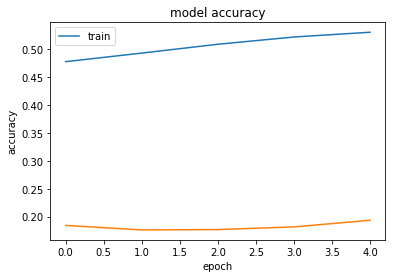

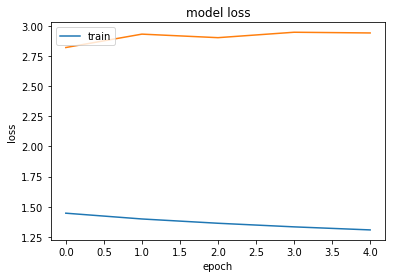

In [27]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
epochs = 20

In [29]:
# fits the model on batches with real-time data augmentation:
history3 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train) / batch_size, 
                              validation_data=datagen_test.flow(x_test, y_test, batch_size=batch_size),
                              validation_steps= len(x_train) / batch_size,
                              epochs=epochs)
#prev : loss: 1.0740 - acc: 0.6201 - val_loss: 9.1439 - val_acc: 0.4091

Epoch 1/20
782/781 [==============================] - 44s - loss: 1.2799 - acc: 0.5414 - val_loss: 2.8860 - val_acc: 0.1991
Epoch 2/20
782/781 [==============================] - 44s - loss: 1.2558 - acc: 0.5506 - val_loss: 2.9798 - val_acc: 0.2123
Epoch 3/20
782/781 [==============================] - 42s - loss: 1.2385 - acc: 0.5573 - val_loss: 2.7807 - val_acc: 0.2171
Epoch 4/20
782/781 [==============================] - 43s - loss: 1.2159 - acc: 0.5629 - val_loss: 2.7706 - val_acc: 0.2155
Epoch 5/20
782/781 [==============================] - 43s - loss: 1.2022 - acc: 0.5721 - val_loss: 2.9667 - val_acc: 0.1931
Epoch 6/20
782/781 [==============================] - 43s - loss: 1.1859 - acc: 0.5780 - val_loss: 2.8900 - val_acc: 0.2153
Epoch 7/20
782/781 [==============================] - 44s - loss: 1.1695 - acc: 0.5819 - val_loss: 2.8448 - val_acc: 0.2276
Epoch 8/20
782/781 [==============================] - 43s - loss: 1.1564 - acc: 0.5877 - val_loss: 2.8767 - val_acc: 0.2367
Epoch 9/

In [30]:
# fits the model on batches with real-time data augmentation:
history4 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train) / batch_size, 
                              validation_data=datagen_test.flow(x_test, y_test, batch_size=batch_size),
                              validation_steps= len(x_train) / batch_size,
                              epochs=epochs*2)

Epoch 1/40
782/781 [==============================] - 42s - loss: 1.0469 - acc: 0.6320 - val_loss: 2.8514 - val_acc: 0.2412
Epoch 2/40
782/781 [==============================] - 44s - loss: 1.0318 - acc: 0.6348 - val_loss: 2.8265 - val_acc: 0.2850
Epoch 3/40
782/781 [==============================] - 43s - loss: 1.0288 - acc: 0.6383 - val_loss: 2.7309 - val_acc: 0.2759
Epoch 4/40
782/781 [==============================] - 44s - loss: 1.0260 - acc: 0.6400 - val_loss: 2.6762 - val_acc: 0.2658
Epoch 5/40
782/781 [==============================] - 43s - loss: 1.0241 - acc: 0.6400 - val_loss: 2.6164 - val_acc: 0.2674
Epoch 6/40
782/781 [==============================] - 42s - loss: 1.0180 - acc: 0.6432 - val_loss: 2.8197 - val_acc: 0.2730
Epoch 7/40
782/781 [==============================] - 44s - loss: 1.0116 - acc: 0.6465 - val_loss: 3.0047 - val_acc: 0.2281
Epoch 8/40
782/781 [==============================] - 44s - loss: 1.0162 - acc: 0.6441 - val_loss: 2.7131 - val_acc: 0.2818
Epoch 9/

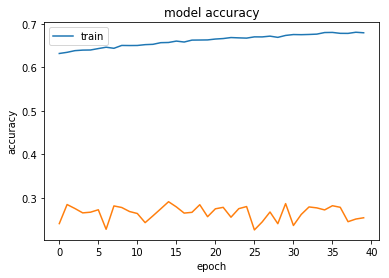

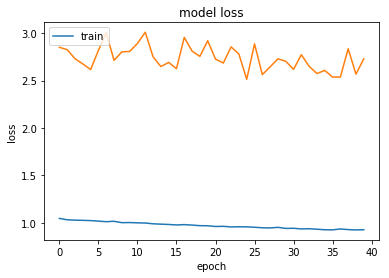

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [33]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s     
Test loss: 2.72961225777
Test accuracy: 0.2546
